<a href="https://colab.research.google.com/github/muhammadfajrulfaiz/Project-Machine-Learning/blob/main/PYTN_Assgn_3_%3Cbatch_4%3E_Muhammad_Fajrul_Faiz_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from time import time
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
#ANN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Loading

In [2]:
 df = pd.read_csv("/content/drive/MyDrive/Hacktiv8/bank-additional-full (1).csv", delimiter=';')

In [3]:
#looking at dataset
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Cleansing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#drop nulls values and check full features dataset
df = df.dropna()
print(df.shape)
print(list(df.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [6]:
# Mengambil data dengan type object
object_cols = df.select_dtypes(include = ['object']).columns

# Mengambil data dengan type float dan int64
float_cols = df.select_dtypes(include = ['float', 'int64']).columns

In [7]:
object_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [8]:
#clean duplicated rows in datases
#df = df.drop_duplicates()
#sum(df.duplicated())

# Exploratory Data Analytics (EDA)

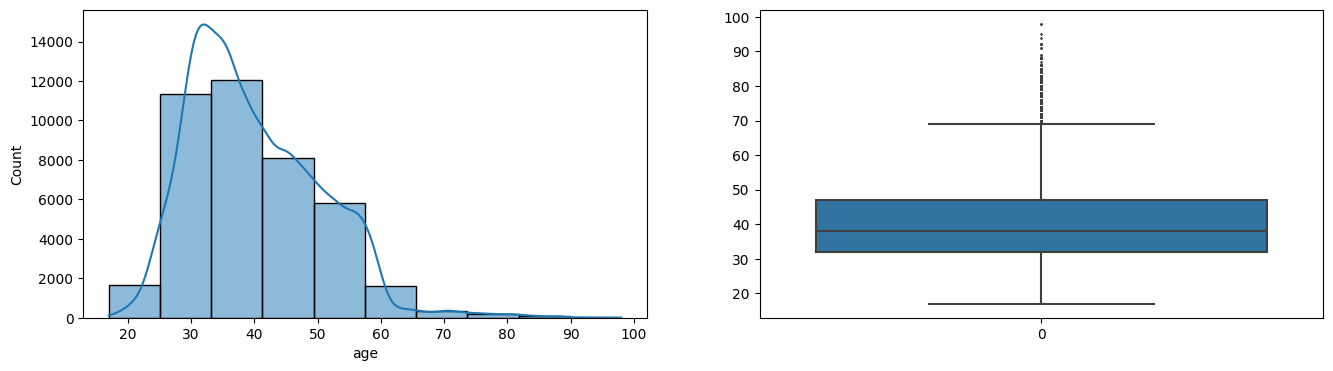

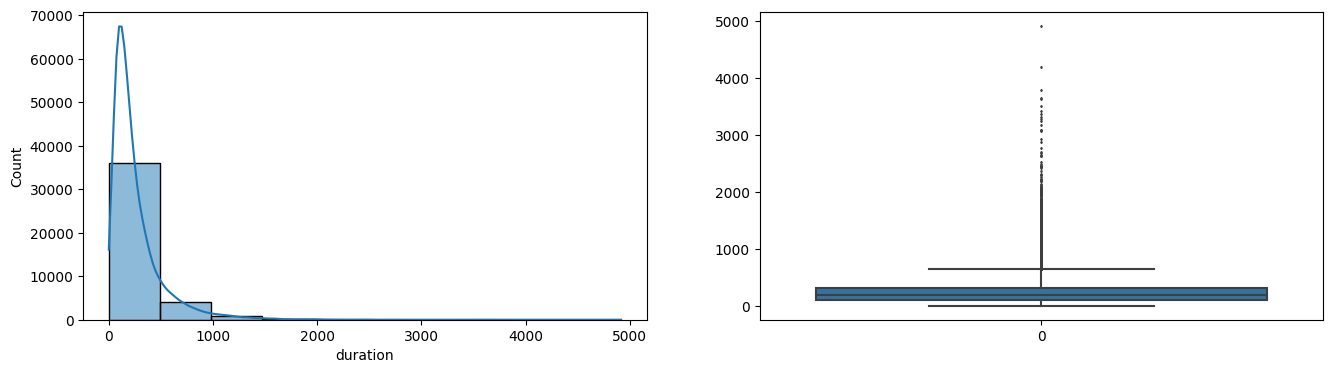

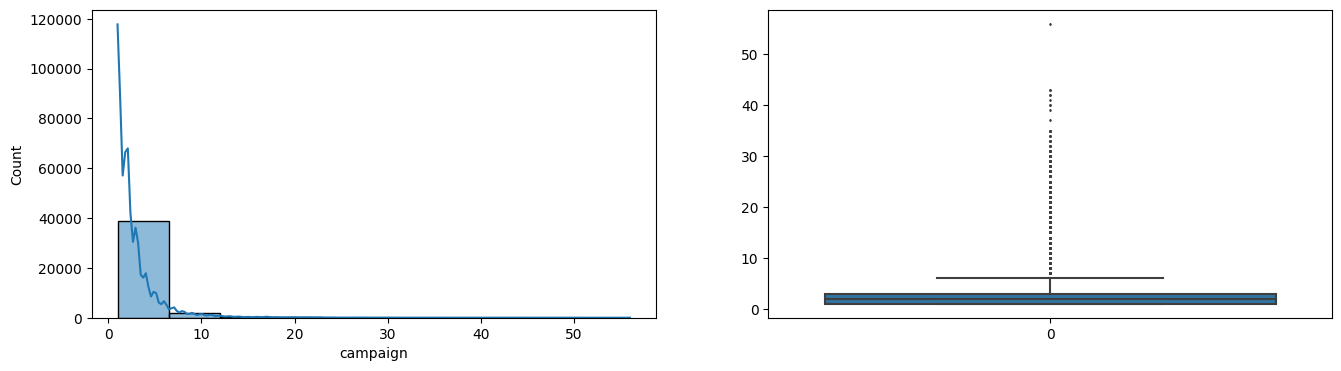

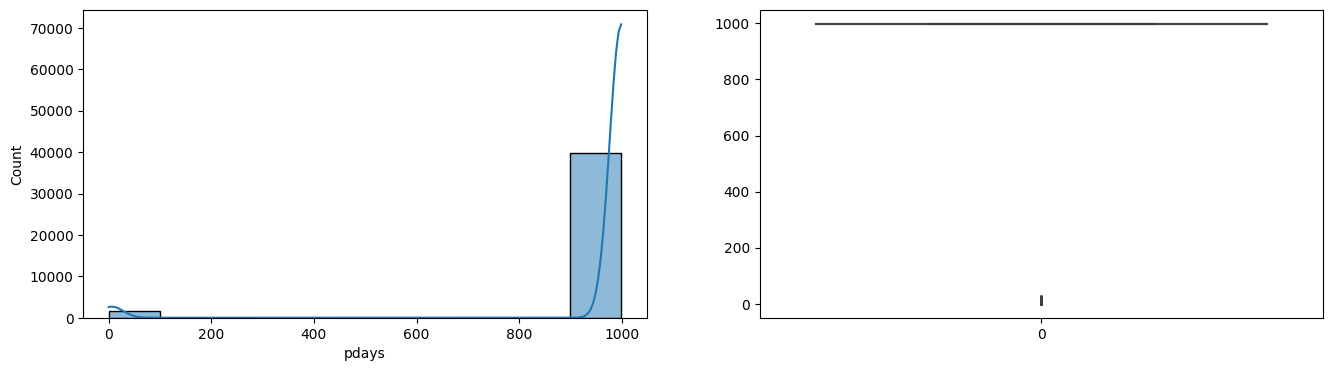

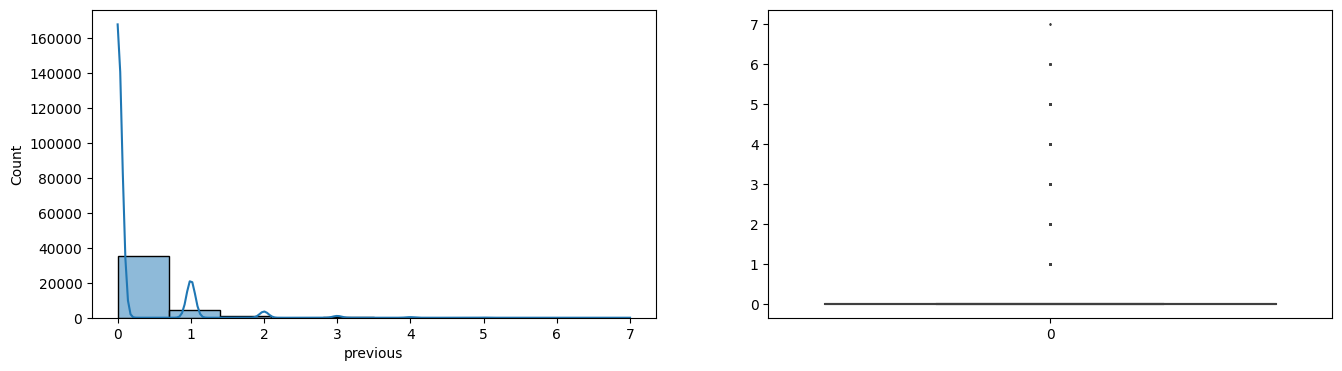

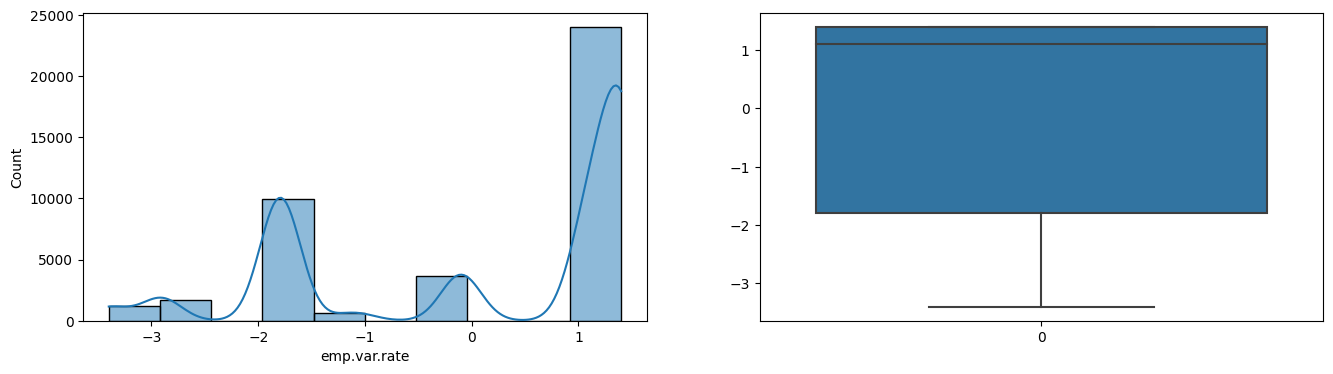

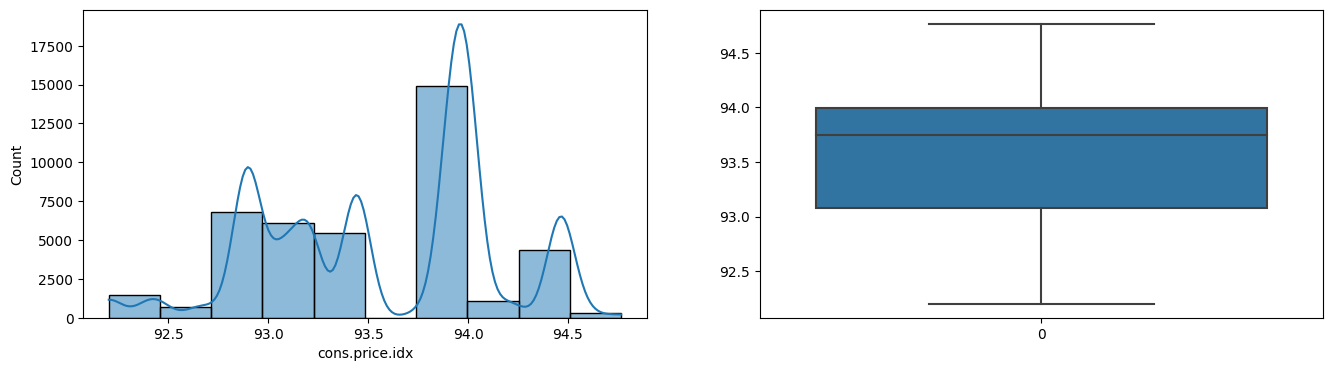

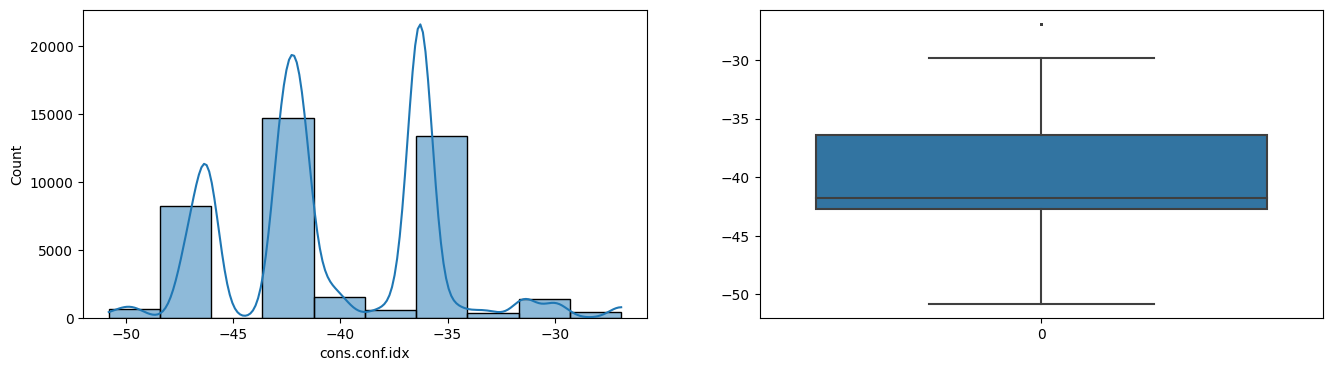

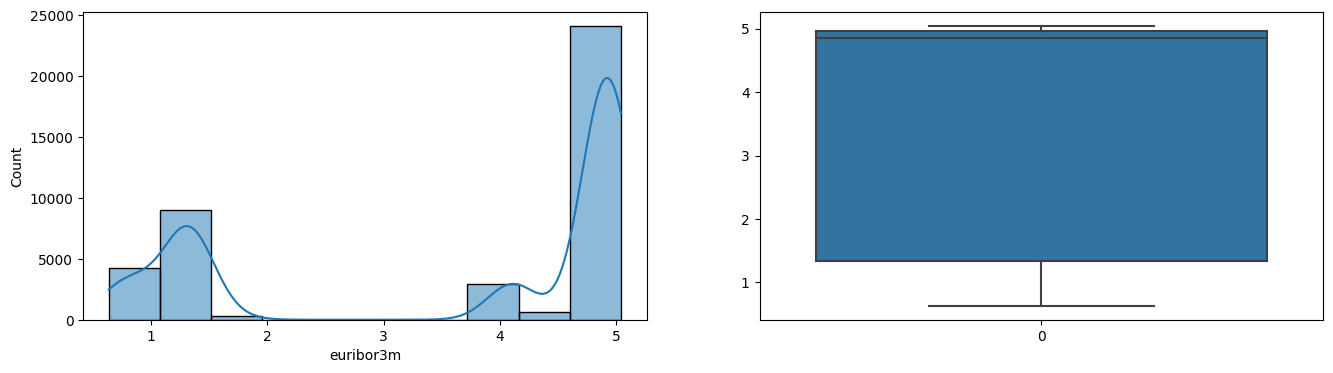

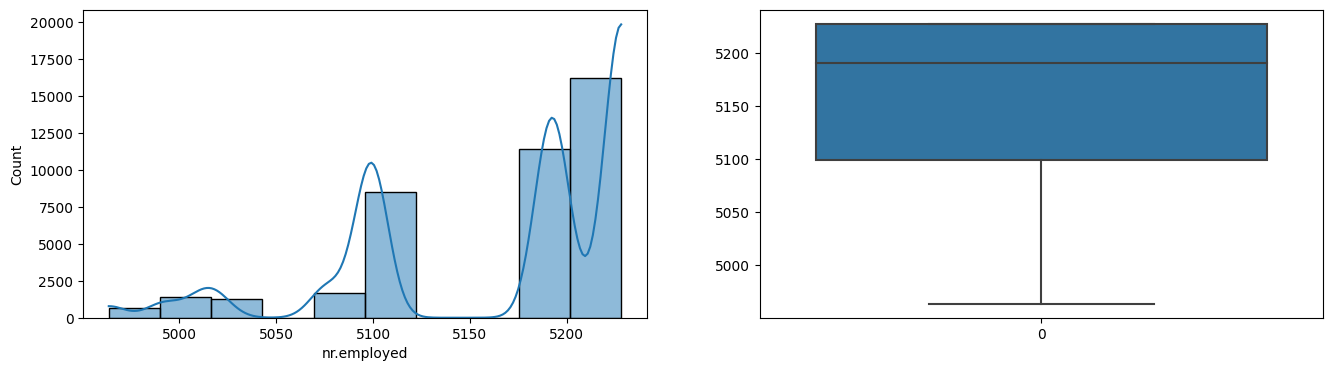

In [9]:
for col in float_cols:
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
    sns.histplot(df[col], bins=10, kde=True,  ax=ax[0])
    sns.boxplot(df[col], fliersize=1, ax=ax[1])

In [10]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [11]:
df['education']=np.where(df['education'] =='basic.9y','Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y','Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y','Basic', df['education'])
df['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

<Axes: title={'center': 'Education'}>

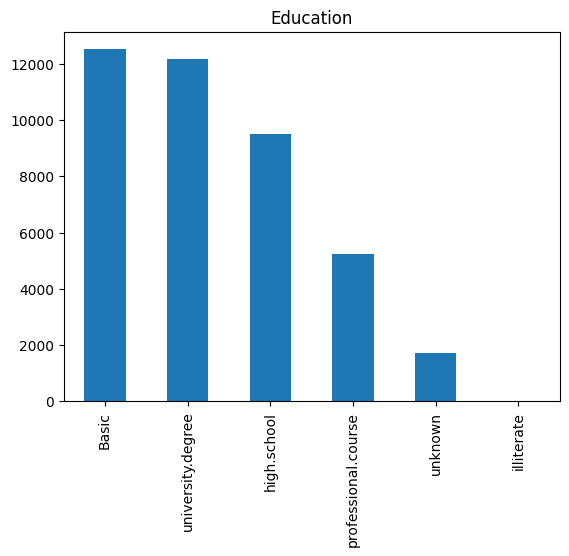

In [12]:
df['education'].value_counts().plot(kind='bar', title = "Education")

In [13]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

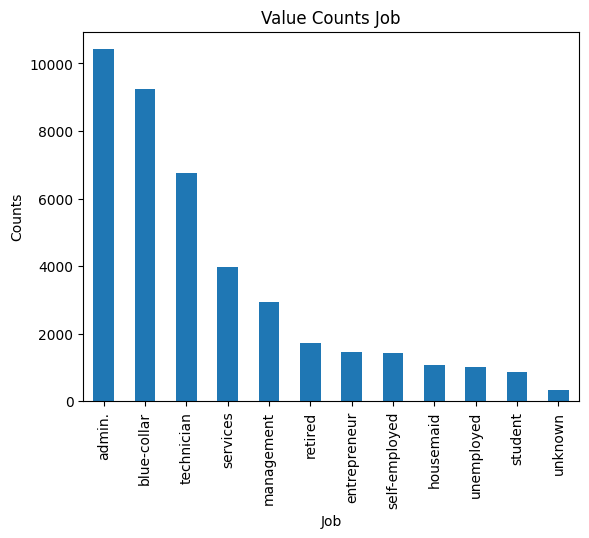

In [14]:
job = df['job'].value_counts()
job
job.plot(kind='bar')
plt.xlabel("Job")
plt.ylabel("Counts")
plt.title("Value Counts Job")
plt.show()

In [15]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

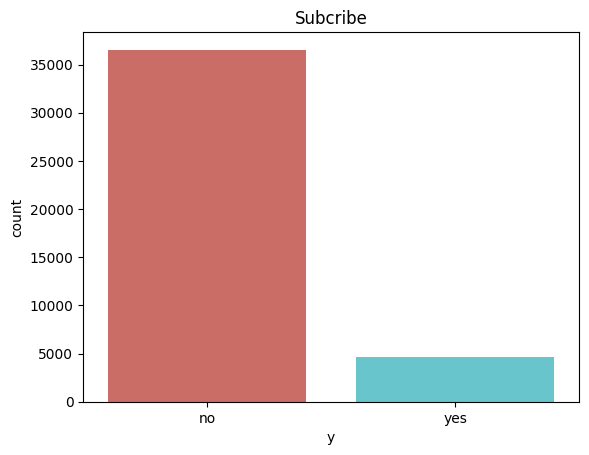

<Figure size 640x480 with 0 Axes>

In [16]:
sns.countplot(x='y', data=df, palette='hls')
plt.title('Subcribe')
plt.show()
plt.savefig('count_plot')

In [17]:
jumlah_tidak_subcribe = len(df[df['y']=='no'])
jumlah_subcribe = len(df[df['y']=='yes'])
pct_of_no_sub = jumlah_tidak_subcribe/(jumlah_tidak_subcribe+jumlah_subcribe)
print("subcribe", pct_of_no_sub*100)
pct_of_sub = jumlah_subcribe/(jumlah_tidak_subcribe+jumlah_subcribe)
print("Didn't Subscribe", pct_of_sub*100)

subcribe 88.73458288821988
Didn't Subscribe 11.265417111780131


In [18]:
df.groupby('y').mean()

<ipython-input-18-e1dafff4daf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [19]:
df.groupby('job').mean()

<ipython-input-19-bb859882ed41>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('job').mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [20]:
df.groupby('marital').mean()

<ipython-input-20-aa67e1a5c2fa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('marital').mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750


In [21]:
df.groupby('education').mean()

<ipython-input-21-f8d0642ca27f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('education').mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [22]:
# Cek korelasi antara jenis job atau profesi berpengaruh dalam people will subcribe or not

data_job = pd.crosstab(df.job, df.y)
data_job

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


Text(0, 0.5, 'Purchase Frequency')

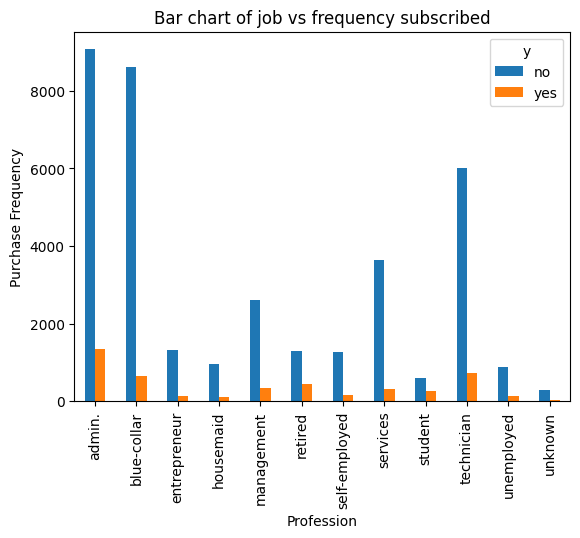

In [23]:
data_job.plot(kind='bar')
plt.title("Bar chart of job vs frequency subscribed")
plt.xlabel("Profession")
plt.ylabel("Purchase Frequency")

Dari barchart diatas dapat insight bahwa :
1. profesi admin merupakan jumlah subcribe terbesar akan tetapi juga jumlah no subcribe juga terbesar
2. profesi blue-collar merupakan indeks kedua terbesar tidak subcribe dibanding dengan profesi lainya dan jumlah subcribe tertinggi ke 3
3. profesi seorang teknisi dapat dikatakan no 2 terbesar subcribe dibawah admin
4. diantara semua profesi jumlah no subcribe masih jauh lebih besar daripada subcribed


In [24]:
# mengecek apakah education berpengaruh besar dalam jumlah subcribe

data = pd.crosstab(df.education, df.y)
data


y,no,yes
education,,
Basic,11424,1089
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


Text(0, 0.5, 'jumlah subcribe')

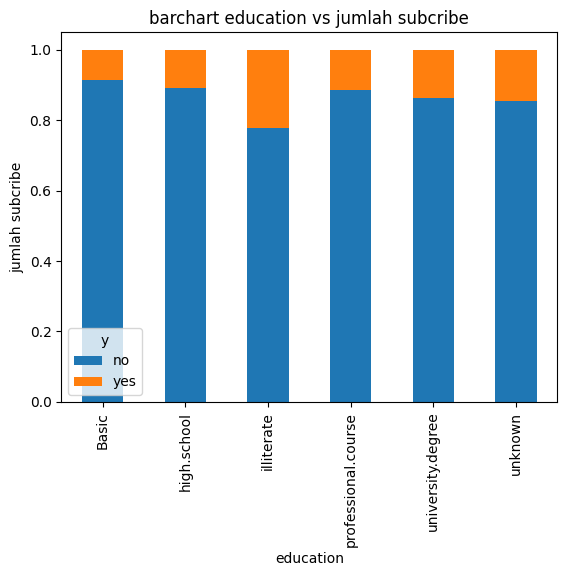

In [25]:
#memvisualisasikan dataframe diatas
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar',stacked =True)
plt.title('barchart education vs jumlah subcribe')
plt.xlabel('education')
plt.ylabel('jumlah subcribe')

In [26]:
#cek apakah status pernikahan mempengaruhi jumlah dari subcribed
data = pd.crosstab(df.marital, df.y)
data

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


Text(0, 0.5, 'jumlah pembelian')

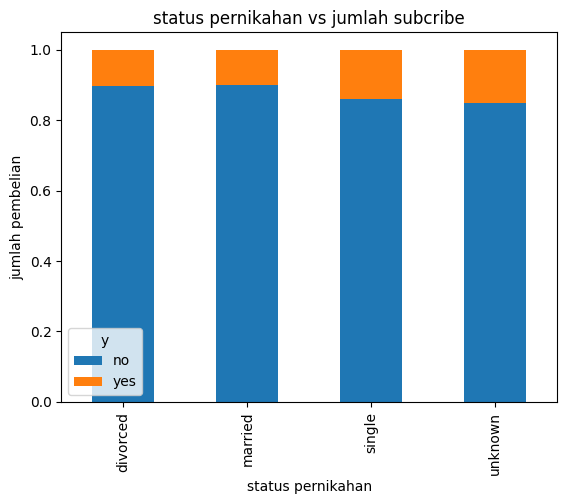

In [27]:
# visualisasi
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("status pernikahan vs jumlah subcribe")
plt.xlabel("status pernikahan")
plt.ylabel("jumlah pembelian")

In [28]:
# cek jumlah frekuensi subcribe dalam kolom month
table_month =  pd.crosstab(df.month, df.y)
table_month

y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


Text(0, 0.5, 'Purchase Frequency')

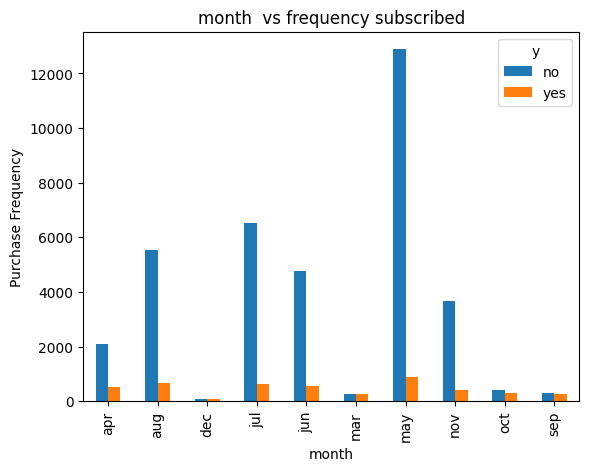

In [29]:
table_month.plot(kind='bar')
plt.title("month  vs frequency subscribed")
plt.xlabel("month")
plt.ylabel("Purchase Frequency")

Text(0, 0.5, 'Frequency')

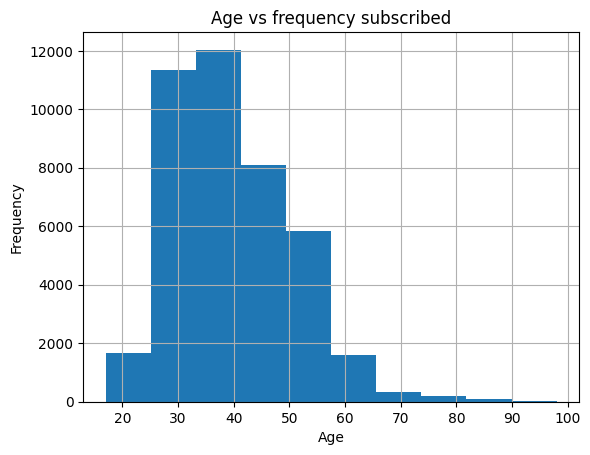

In [30]:
# histogram of age dalam frekuensi sibcribe

df.age.hist()
plt.title('Age vs frequency subscribed')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Data Preprocessing

## 1. LABEL ENCODING

In [31]:
object_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [32]:
label_encoder = LabelEncoder()
for i in object_cols:
    df[i] = label_encoder.fit_transform(df[i])

In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## 2. preprocessing pada korelasi antar fitur

In [34]:
# Cek korelasi antar fitur
corelasi = df.corr()
print(corelasi['y'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
contact          -0.144773
cons.price.idx   -0.136211
default          -0.099352
campaign         -0.066357
month            -0.006065
loan             -0.004909
housing           0.011552
day_of_week       0.015967
job               0.025122
age               0.030399
marital           0.046203
cons.conf.idx     0.054878
education         0.063032
poutcome          0.129789
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64


In [35]:
# drop columns that hass less correlation
df.drop(columns=[
    'nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','contact','month','campaign', 'day_of_week'
    ], axis=0, inplace=True)

<ipython-input-36-70ee870f2894>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corelasi, dtype=np.bool))


Text(0.5, 1.0, 'Correlation')

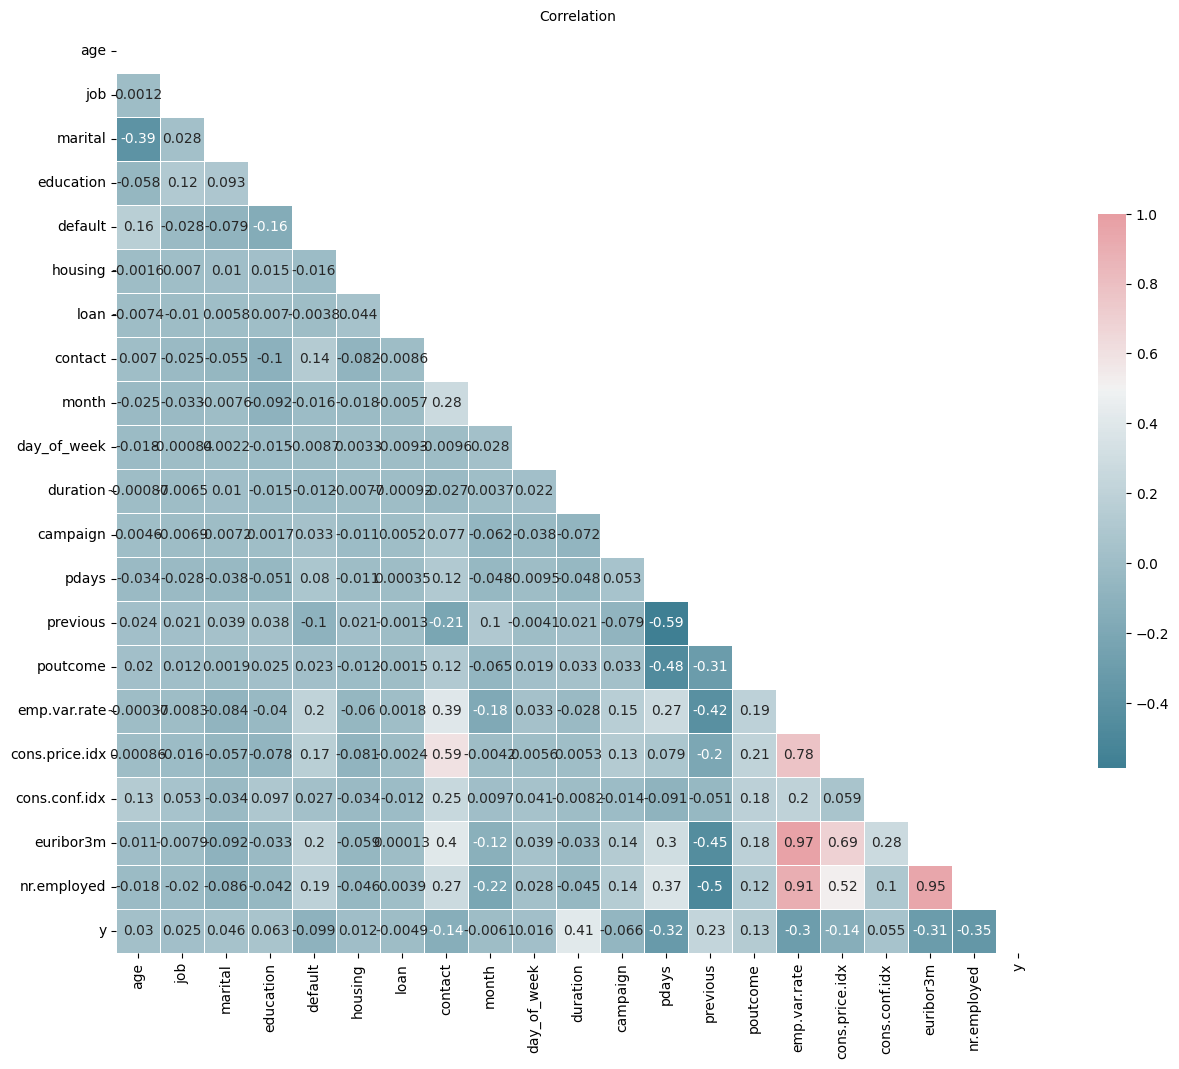

In [36]:
mask = np.triu(np.ones_like(corelasi, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#visualize heatmap
sns.heatmap(corelasi,
            mask=mask,
            cmap=cmap,
            vmax=1,
            center=0.5,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)

## 3. splitting data and scalling

In [37]:
# pisah data target dengan features

X = df.drop(columns = 'y', axis=1).values
y = df['y'].values

In [38]:
#split data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [39]:
# cek values of subcribe with 'y' columns

df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [40]:
# scalling data terhadap data training

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
accuracy_list= []

# Modeling

## logistic Regression

In [41]:
lr = LogisticRegression(solver='liblinear', random_state=1)
lr.fit(X_train, y_train)

#prediksi output
test_pred = lr.predict(X_test)

In [42]:
# Akurasi dari model
print("Accuracy:", accuracy_score(y_test, test_pred))

Accuracy: 0.1164117504248604


In [43]:
# model evaluation
log_reg_acc = accuracy_score(y_test, test_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7279
           1       0.12      1.00      0.21       959

    accuracy                           0.12      8238
   macro avg       0.06      0.50      0.10      8238
weighted avg       0.01      0.12      0.02      8238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


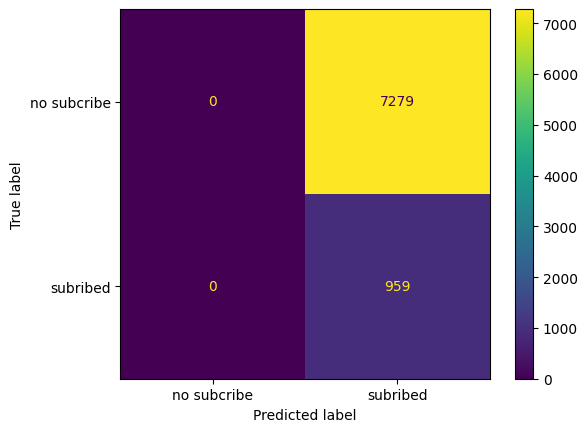

In [44]:
# confusion matrix model
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test,test_pred)
cmd = ConfusionMatrixDisplay( cm, display_labels=['no subcribe', 'subribed'])
cmd.plot()
plt.show()

## SVM

In [45]:
# Model SVM
start =  time()
svm = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
end =  time()

print(f"SVM Time:{round((end - start), 5) * 1000}")
print("Accuracy:", accuracy_score(y_test, y_pred))

SVM Time:24561.64
Accuracy: 0.8835882495751396


In [46]:
# evaluation model

svm_acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*svm_acc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7279
           1       0.00      0.00      0.00       959

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


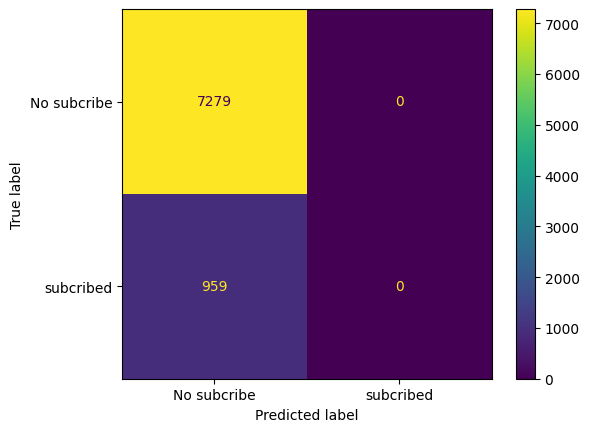

In [47]:
confusion_matrix = confusion_matrix(y_test, y_pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix, display_labels=['No subcribe','subcribed'])
display_cm.plot()
plt.show()

# KNN

In [48]:
# model for KNN algorithm

start =  time()
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
end = time()

# cek akurasi and time
print(f"KNN Time:{round((end - start), 5) * 1000}")
print("Accuracy:", accuracy_score(y_test, y_pred))

KNN Time:569.78
Accuracy: 0.8504491381403253


In [49]:
#model evaluation

knn_acc =  accuracy_score(y_test, y_pred)
accuracy_list.append(100*knn_acc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7279
           1       0.00      0.00      0.00       959

    accuracy                           0.85      8238
   macro avg       0.44      0.48      0.46      8238
weighted avg       0.78      0.85      0.81      8238



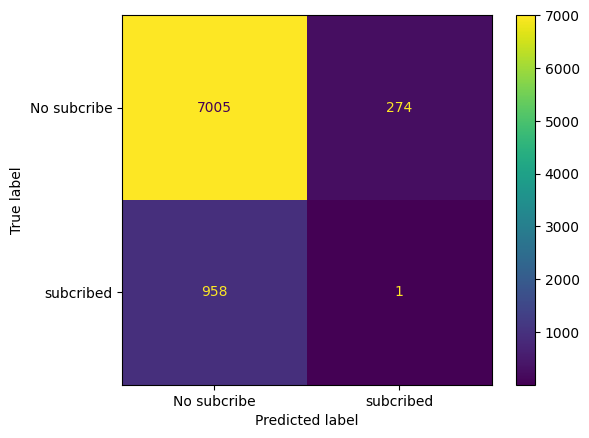

In [50]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix, display_labels=['No subcribe','subcribed'])
display_cm.plot()
plt.show()

# Decision Tree Model

In [51]:
#Membuat model

start = time()
DT = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1, criterion='entropy')
DT.fit(X_train, y_train)
dt_pred = DT.predict(X_test)
end = time ()

# cek akurasi and time
print(f"KNN Time:{round((end - start), 5) * 1000}")
print("Accuracy:", accuracy_score(y_test, dt_pred))

KNN Time:40.54
Accuracy: 0.8835882495751396


In [52]:
#model evaluation

DT_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*DT_acc)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7279
           1       0.00      0.00      0.00       959

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


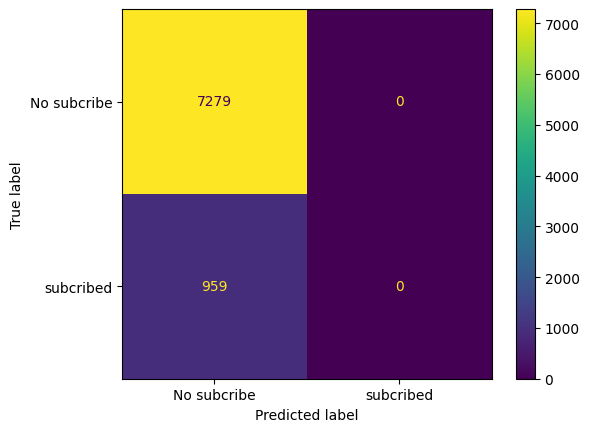

In [53]:
# confusion matrix DT Model
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

confusion_DT = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(confusion_DT, display_labels=['No subcribe','subcribed'])
cmd.plot()
plt.show()

# Random Forest

In [54]:
rf_model = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)

# cek akurasi model

print("Accuracy:", accuracy_score(y_test, rf_prediction))

Accuracy: 0.8557902403495994


In [55]:
#model evaluation

rf_acc = accuracy_score(y_test,rf_prediction )
accuracy_list.append(100*rf_acc)
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7279
           1       0.32      0.21      0.25       959

    accuracy                           0.86      8238
   macro avg       0.61      0.57      0.59      8238
weighted avg       0.83      0.86      0.84      8238



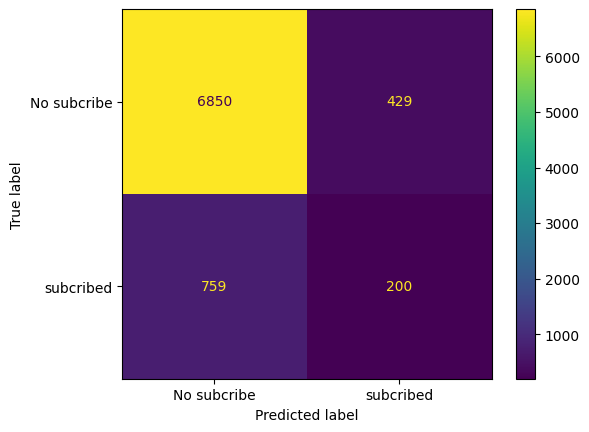

In [56]:
# Confusion MATRIX

cm = confusion_matrix(y_test, rf_prediction)
cmd =  ConfusionMatrixDisplay(cm, display_labels=['No subcribe','subcribed'])
cmd.plot()
plt.show()

# Naive Bayes

In [57]:
#Build a Gaussian Classfier
nv = GaussianNB()

# Model Training
nv.fit(X_train, y_train)

#prediksi output
y_pred_nv = nv.predict(X_test)

# Cek akurasi model
print("Accuracy:", accuracy_score(y_test, y_pred_nv))

Accuracy: 0.1164117504248604


In [58]:
#model evaluation

nv_acc = accuracy_score(y_test,y_pred_nv )
accuracy_list.append(100*nv_acc)
print(classification_report(y_test, y_pred_nv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7279
           1       0.12      1.00      0.21       959

    accuracy                           0.12      8238
   macro avg       0.06      0.50      0.10      8238
weighted avg       0.01      0.12      0.02      8238



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


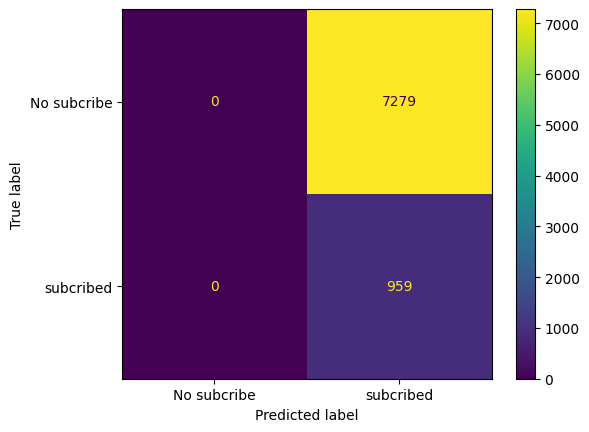

In [59]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred_nv)
display_cm = ConfusionMatrixDisplay(confusion_matrix, display_labels=['No subcribe','subcribed'])
display_cm.plot()
plt.show()
